<center><h1 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";font-size:42px;border-radius:10px;'>CUSTOMER SEGMENTATION</h1></center>

<center><img src="custem.jpg"style="border: 5px solid black; width:800px;height:400px;" /></center>
In this project, I will be performing an unsupervised clustering of data on the customer's records from a groceries firm's database. Customer segmentation is the practice of separating customers into groups that reflect similarities among customers in each cluster. I will divide customers into segments to optimize the significance of each customer to the business. To modify products according to distinct needs and behaviours of the customers. It also helps the business to cater to the concerns of different types of customers.


<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>IMPORTING LIBRARIES</h2></center>

In [1]:
#Importing the Libraries
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
import scipy.cluster.hierarchy as shc 
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>LOADING DATA</h2></center>

In [2]:
data=pd.read_csv('marketing_campaign (1).csv',sep='\t')
data.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>DATA CLEANING</h2></center>

In this section
<li>
.Data Cleaning</li>
<li> feature Engineering</li>
In order to, get a full grasp of what steps should I be taking to clean the dataset. Let us have a look at the information in data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

**From the above output, we can conclude and note that:**
<li> There are missing values in income</li>
<li> we need to convert Dt_customer to date time as it contain informaton about joining date of customer to company</li>
<li> we have to do feature engineering of catogorical columns</li>


In [4]:
#To remove the NA values
data = data.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(data))

The total number of data-points after removing the rows with missing values are: 2216


<p style='font-size:12px;'>In the next step, I am going to create a feature out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, I am taking this value relative to the most recent customer in the record.
Thus to get the values I must check the newest and oldest recorded dates.</p>

In [5]:
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"],format='mixed')
dates = []
for i in data["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


<p style='font-size:12px;'>Creating a feature ("Customer_For") of the number of days the customers started to shop in the store relative to the last recorded date</p>

In [6]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
data["Customer_For"] = days
data["Customer_For"] = pd.to_numeric(data["Customer_For"], errors="coerce")

In [7]:
print("Total categories in the feature Marital_Status:\n", data["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", data["Education"].value_counts())

Total categories in the feature Marital_Status:
 Marital_Status
Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Total categories in the feature Education:
 Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64


**now we will be performing the following steps to engineer some new features:**
<ul style='font-size:14;list-style-type:disc;'>
<li>Extract the "Age" of a customer by the "Year_Birth" indicating the birth year of the respective person.</li>
<li>Create another feature "Spent" indicating the total amount spent by the customer in various categories over the span of two years.</li>
<li>Create another feature "Living_With" out of "Marital_Status" to extract the living situation of couples.</li>
<li>Create a feature "Children" to indicate total children in a household that is, kids and teenagers.</li>
<li>To get further clarity of household, Creating feature indicating "Family_Size"</li>
<li>Create a feature "Is_Parent" to indicate parenthood status</li>
<li>create three categories in the "Education" by simplifying its value counts.</li>
<li>Dropping some of the redundant features</li>
</ul>

In [8]:
#Feature Engineering
#Age of customer today 
data["Age"] = 2025-data["Year_Birth"]

#Total spendings on various items
data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

#Deriving living situation by marital status"Alone"
data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
data["Children"]=data["Kidhome"]+data["Teenhome"]

#Feature for total members in the householde
data["Family_Size"] = data["Living_With"].replace({"Alone": 1, "Partner":2})+ data["Children"]

#Feature pertaining parenthood
data["Is_Parent"] = np.where(data.Children> 0, 1, 0)

#Segmenting education levels in three groups
data["Education"]=data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
data = data.drop(to_drop, axis=1)

In [9]:
#view of data
data.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  ...  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  ...   
mean     26.356047   166.995939    37.637635    27.028881    43.965253  ...   
std      39.793917   224.283273    54.752082    41.072046    51.815414  ...   
min       0.000000     0.000000     0.000000     0.000000     0.000000  ...   
25%       2.000000    16.000000     3.000000     1.000000     9.000000  ...   
50%       8.000000    68.000000    12.000000     8.000000    24.500000  ...   
75%      33.000000   232.250000    50.000000    33.000000    56.000000  ...   
max     199.000000  1725.000000   259.000000   262.000000   321.000000  ...   

       AcceptedCmp1  AcceptedCmp2     Complain     Response  Customer_For  \
count   2216.000000   2216.000000  2216.000000  2216.000000  2.216000e+03   
mean       0.064079      0.013538     0.009477     0.150271  4.423735e+16   
std        0.244950      0.115588     0.096907     0.357417  2.008532e+16   
min        0.000000      0.000000     0.000000     0.000000  0.000000e+00   
25%        0.000000      0.000000     0.000000     0.000000  2.937600e+16   
50%        0.000000      0.000000     0.000000     0.000000  4.432320e+16   
75%        0.000000      0.000000     0.000000     0.000000  5.927040e+16   
max        1.000000      1.000000     1.000000     1.000000  9.184320e+16   

               Age        Spent     Children  Family_Size    Is_Parent  
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000  
mean     56.179603   607.075361     0.947202     2.592509     0.714350  
std      11.985554   602.900476     0.749062     0.905722     0.451825  
min      29.000000     5.000000     0.000000     1.000000     0.000000  
25%      48.000000    69.000000     0.000000     2.000000     0.000000  
50%      55.000000   396.500000     1.000000     3.000000     1.000000  
75%      66.000000  1048.000000     1.000000     3.000000     1.000000  
max     132.000000  2525.000000     3.000000     5.000000     1.000000  

[8 rows x 28 columns]

<p style='font-size:12px;>The above stats show some discrepancies in mean Income and Age and max Income and age.
Do note that max-age is 132 years, As I calculated the age that would be today (i.e. 2021) and the data is old.
I must take a look at the broader view of the data. I will plot some of the selected features.</p>

<p style='font-size:12px;'>The above stats show some discrepancies in mean Income and Age and max Income and age.
Do note that max-age is 132 years, As I calculated the age that would be today (i.e. 2025) and the data is old.
I must take a look at the broader view of the data. I will plot some of the selected features.</p>

Reletive Plot Of Some Selected Features: A Data Subset


<Figure size 800x550 with 0 Axes>

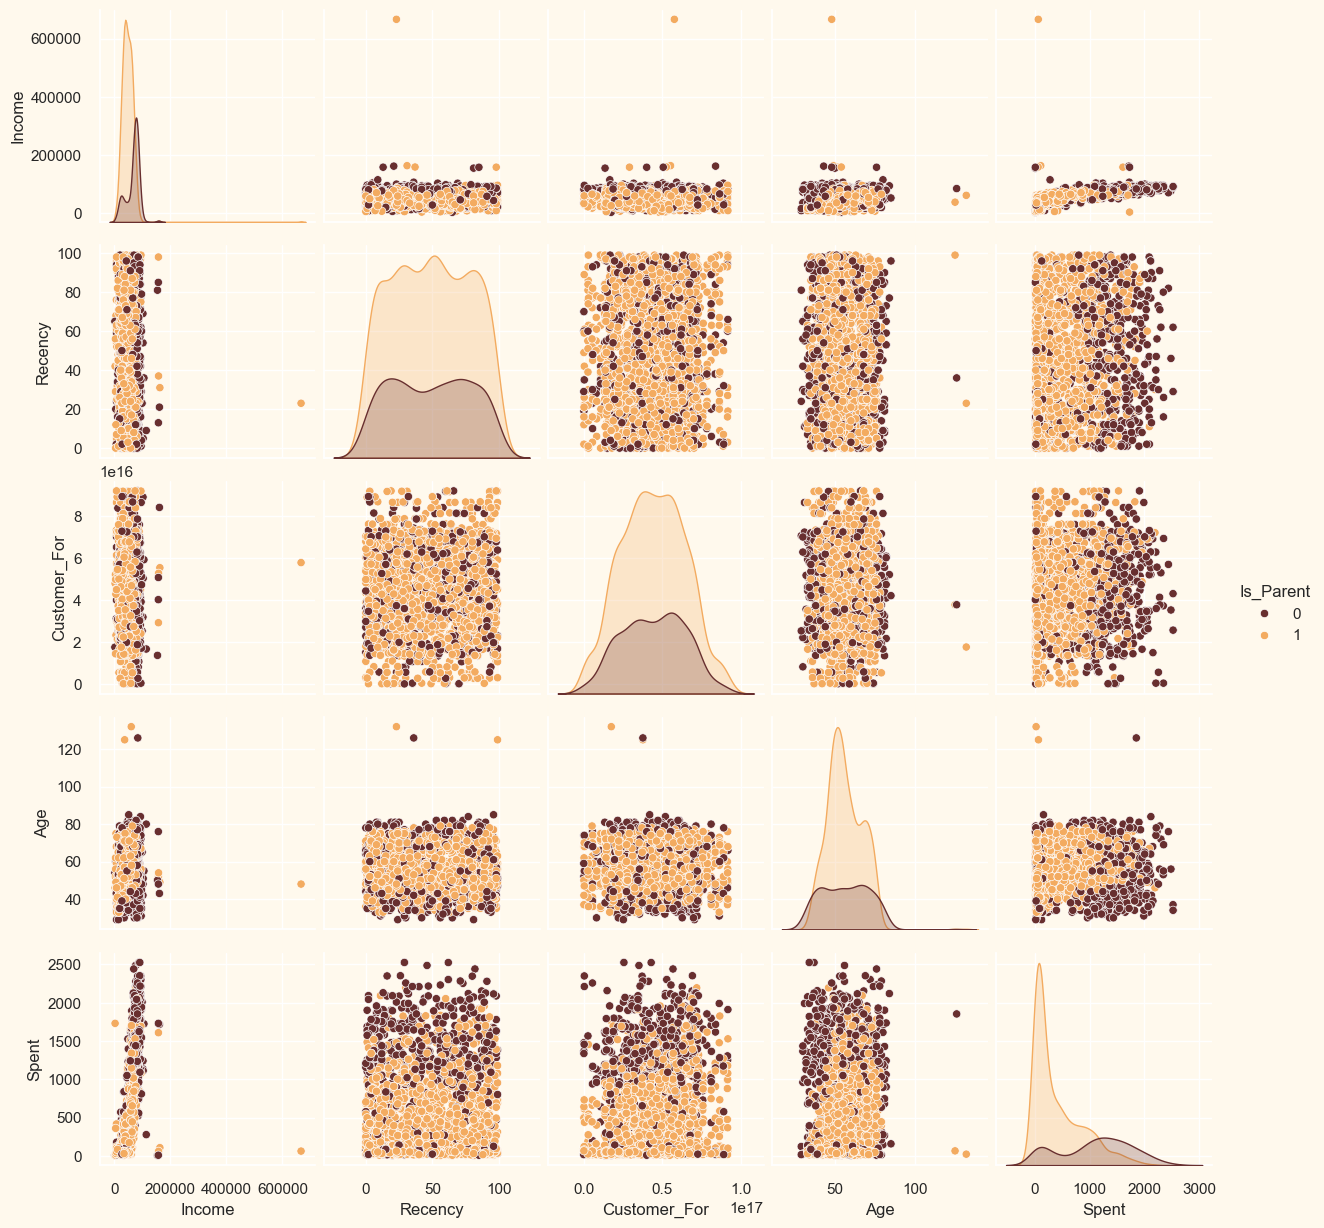

In [10]:
#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
cmap=colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
pallet = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Reletive Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(data[To_Plot], hue= "Is_Parent",palette= (["#682F2F","#F3AB60"]))
#Taking hue 
plt.show()

In [11]:
#Dropping the outliers by setting a cap on Age and income. 
data = data[(data["Age"]<100)]
data = data[(data["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(data))

The total number of data-points after removing the outliers are: 2212


<Axes: >

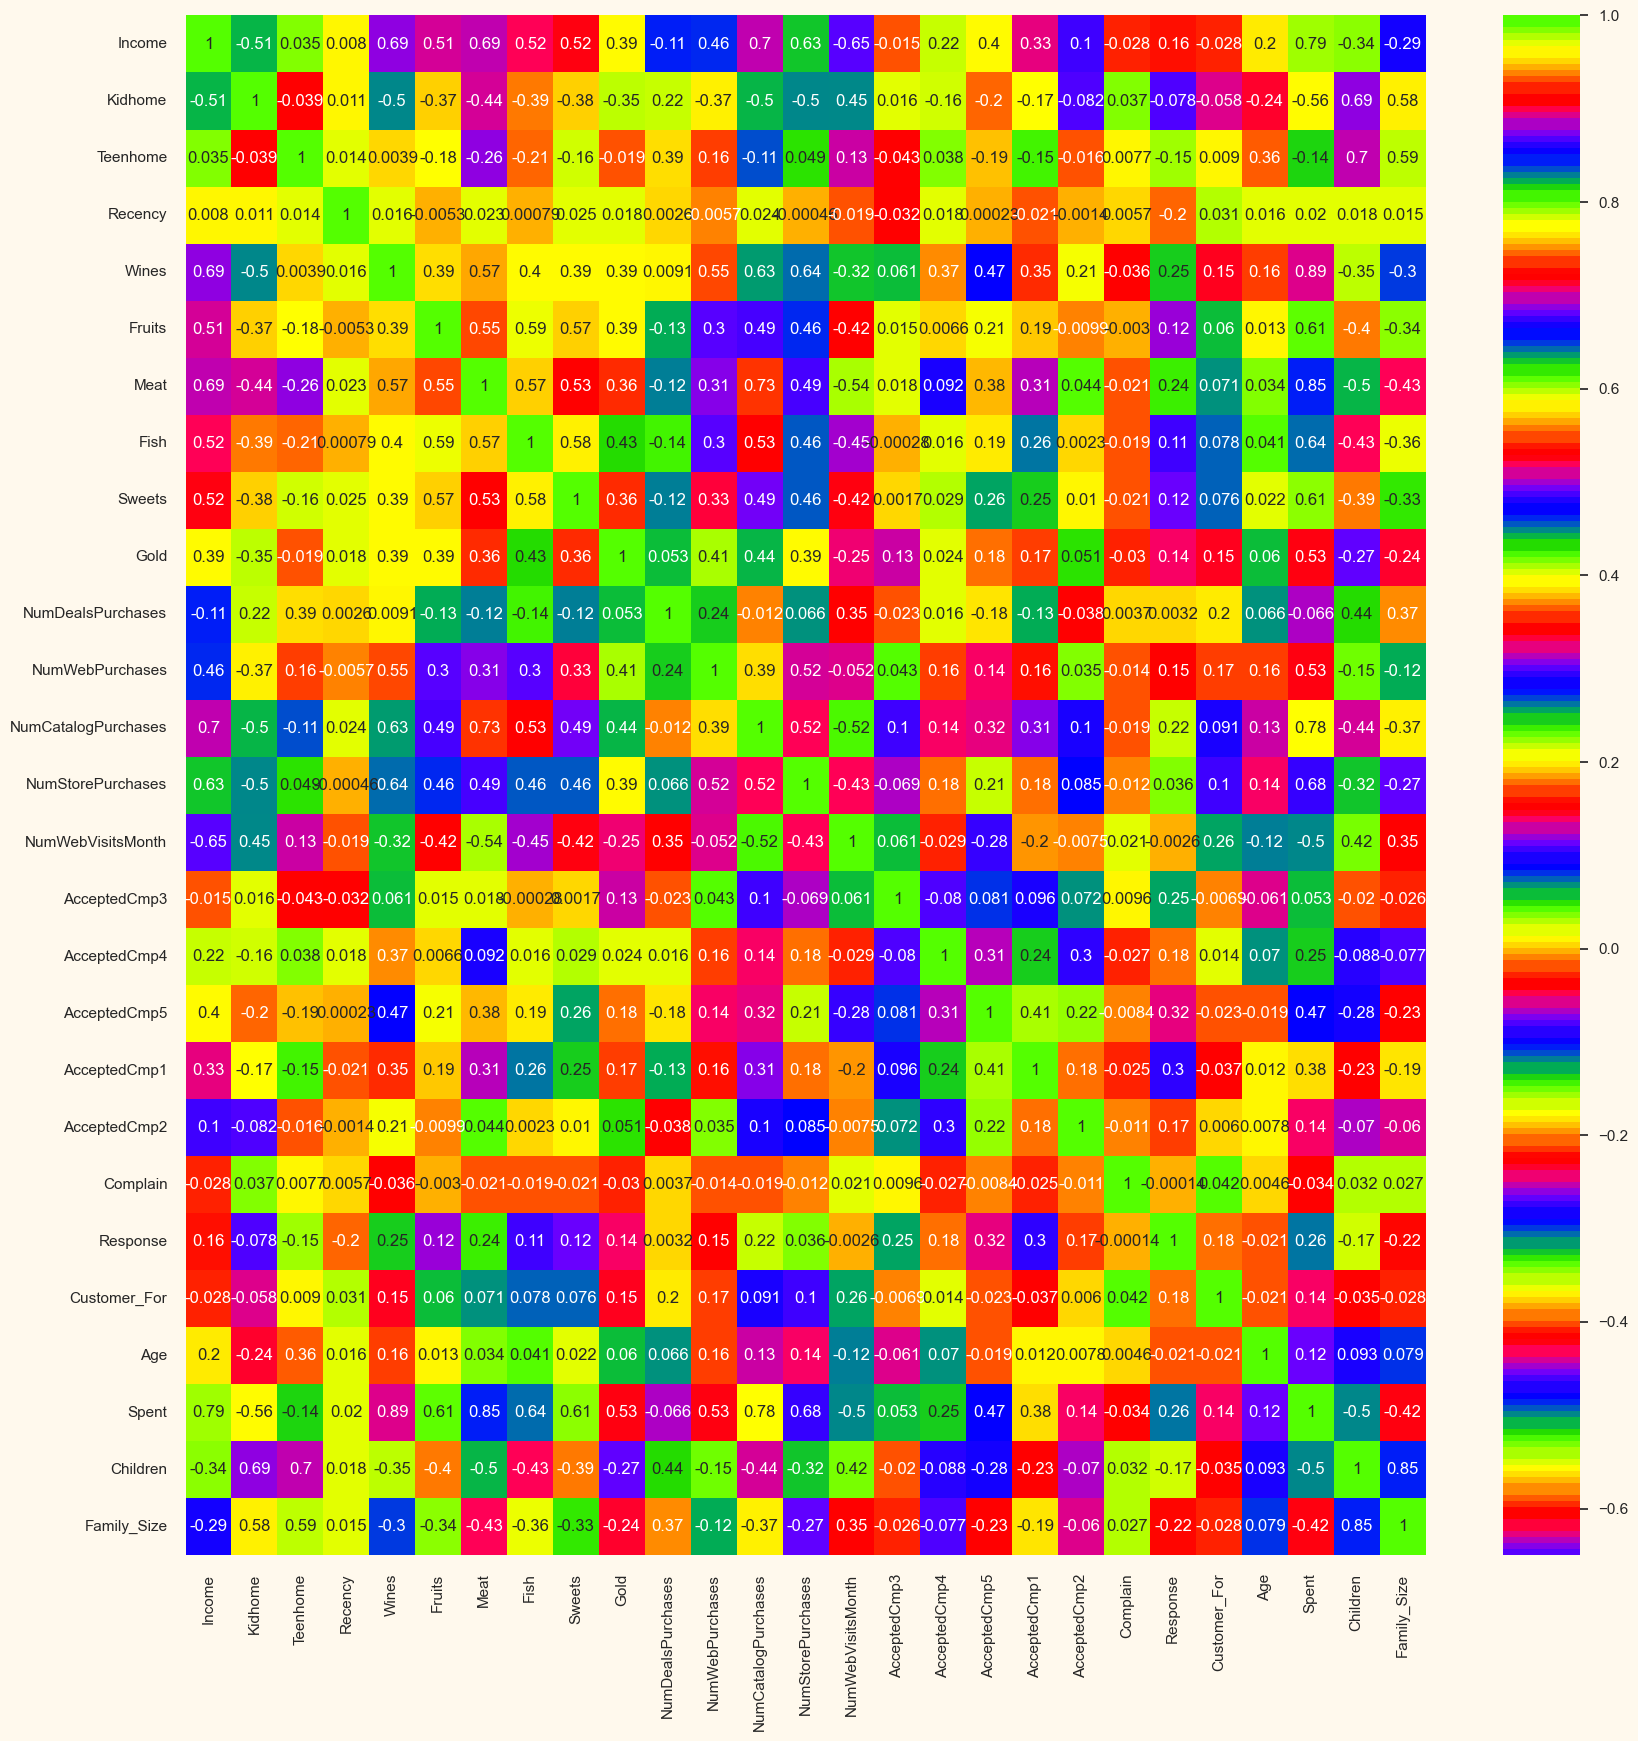

In [12]:
#correlation matrix
num=data.select_dtypes(include=['int64','float64'])
corrmat= num.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corrmat,annot=True, cmap='prism', center=0)

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>DATA PREPROCESSING</h2></center>

In this section, we will be preprocessing the data to perform clustering operations.

**The following steps are applied to preprocess the data:**

<li>Label encoding the categorical features</li>
<li>Scaling the features using the standard scaler</li>
<li>Creating a subset dataframe for dimensionality reduction</li>

In [13]:
#Get list of categorical variables
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [14]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [15]:
#Creating a copy of data
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [16]:
#Scaled data to be used for reducing the dimensionality
print("Dataframe to be used for further modelling:")
scaled_ds.head()

Dataframe to be used for further modelling:


Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets  ...  NumCatalogPurchases  NumStorePurchases  \
0  1.690293  2.453472  1.483713  ...             2.503607          -0.555814   
1 -0.718230 -0.651004 -0.634019  ...            -0.571340          -1.171160   
2 -0.178542  1.339513 -0.147184  ...            -0.229679           1.290224   
3 -0.655787 -0.504911 -0.585335  ...            -0.913000          -0.555814   
4 -0.218684  0.152508 -0.001133  ...             0.111982           0.059532   

   NumWebVisitsMonth  Customer_For       Age     Spent  Living_With  Children  \
0           0.692181      1.973583  1.018352  1.676245    -1.349603 -1.264598   
1          -0.132545     -1.665144  1.274785 -0.963297    -1.349603  1.404572   
2          -0.544908     -0.172664  0.334530  0.280110     0.740959 -1.264598   
3           0.279818     -1.923210 -1.289547 -0.920135     0.740959  0.069987   
4          -0.132545     -0.822130 -1.033114 -0.307562     0.740959  0.069987   

   Family_Size  Is_Parent  
0    -1.758359  -1.581139  
1     0.449070   0.632456  
2    -0.654644  -1.581139  
3     0.449070   0.632456  
4     0.449070   0.632456  

[5 rows x 23 columns]

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>DIMENSIONALITY REDUCTION</h2></center>

In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why we will be performing dimensionality reduction on the selected features before putting them through a classifier.
Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**

<li>Dimensionality reduction with PCA</li>
<li>Plotting the reduced dataframe</li>

**Dimensionality reduction with PCA**

For this project, we will be reducing the dimensions to 3.

In [17]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

count          mean       std       min       25%       50%       75%  \
col1  2212.0 -6.424437e-17  2.878377 -5.969394 -2.538494 -0.780421  2.383290   
col2  2212.0 -6.424437e-17  1.706839 -4.312182 -1.328322 -0.158129  1.242288   
col3  2212.0  3.533440e-17  1.221957 -3.530487 -0.828816 -0.021929  0.799398   

           max  
col1  7.444305  
col2  6.142725  
col3  6.615126

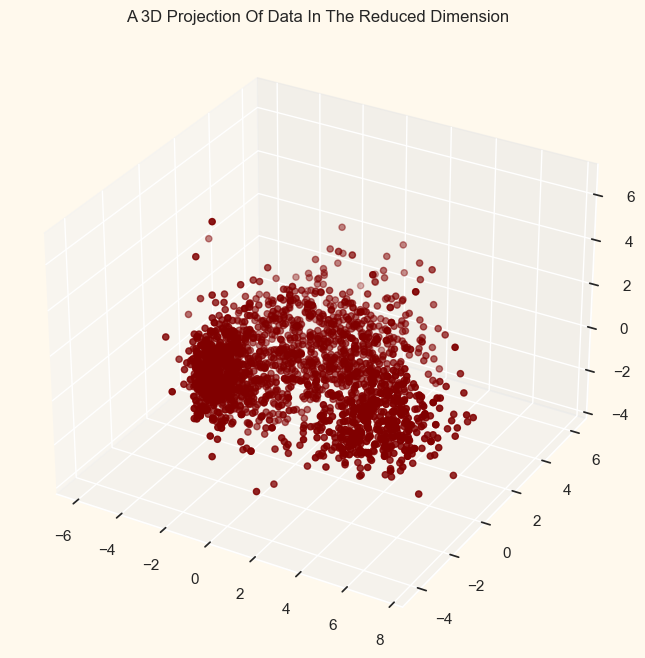

In [18]:
#A 3D Projection Of Data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

<center><h1 style='color:white;background-color:#5c4033;font-family:"Times New Roman";font-size:42px;border-radius:10px;'>CLUSTERING</h1></center>

**K-Means Clustering**

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

The algorithm works as follows:

First we initialize k points, called means, randomly.
We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
We repeat the process for a given number of iterations and at the end, we have our clusters.

**Finding the Optimal Number of Clusters**
    
Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

Elbow Method to determine the number of clusters to be formed:


  File "C:\Users\vijay\anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\vijay\anaconda\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vijay\anaconda\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\vijay\anaconda\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


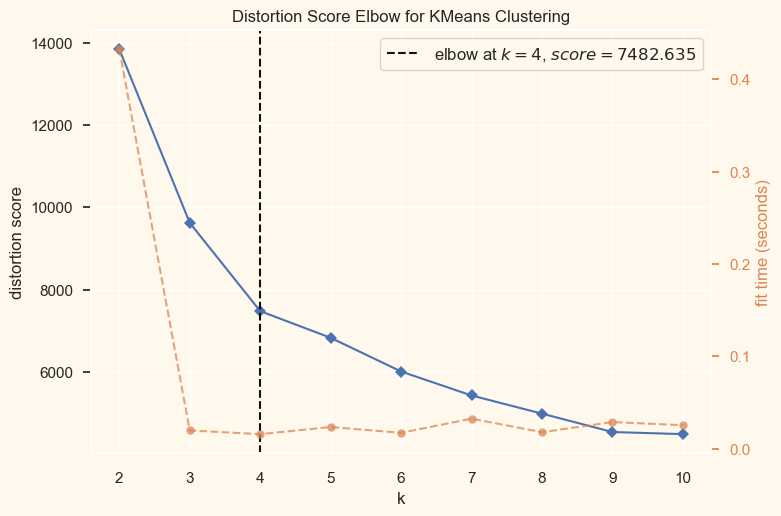

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Elbow-curve/SSD

print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

## Silhouette Analysis ##
 
**silhouette score=p-q/max(p,q)**

**P** is the mean distance to the points in the nearest cluster that the data point is not a part of clustor

**q** is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.4457871528456335
For n_clusters=3, the silhouette score is 0.4122340201633011
For n_clusters=4, the silhouette score is 0.3758025877659402
For n_clusters=5, the silhouette score is 0.3639361230100659


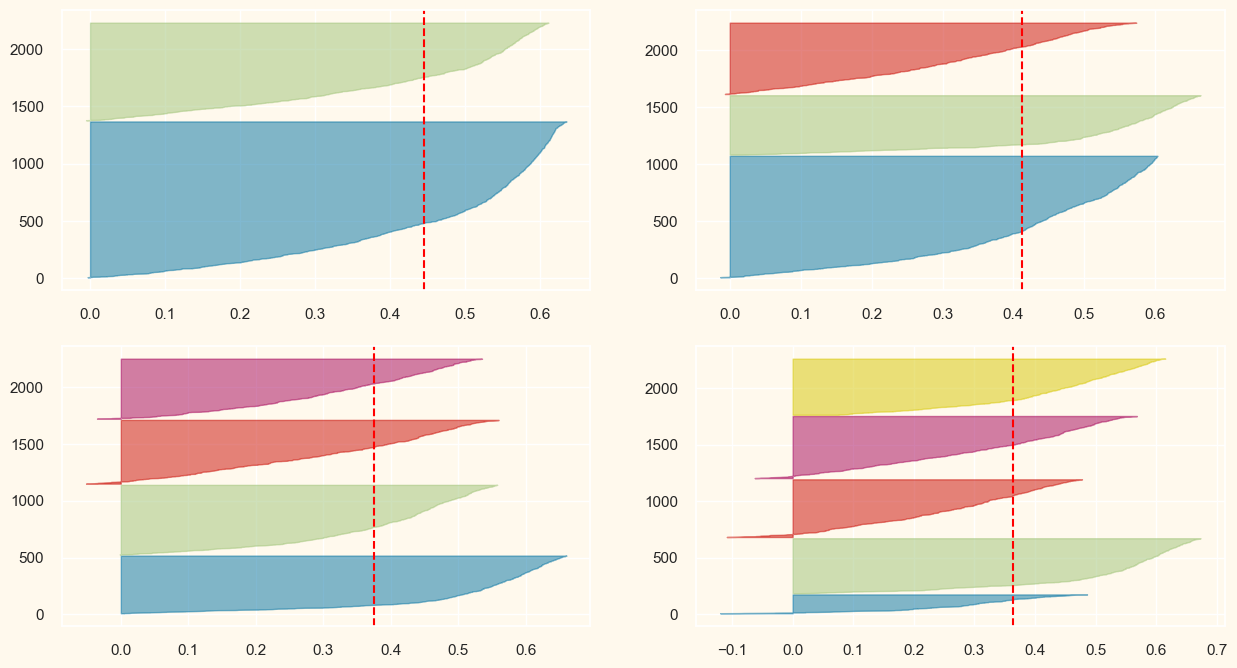

In [20]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5]
fig,ax=plt.subplots(2,2,figsize=(15,8))
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(PCA_ds)
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(PCA_ds, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    
    q,mod=divmod(i,2)
    visual=SilhouetteVisualizer(kmeans,colors='yellowbrick',ax=ax[q-1][mod])
    visual.fit(PCA_ds)
    

In [21]:
#Initiating the Kmeans Clustering model 
AC = KMeans(n_clusters=4,random_state=42)#from both elbow and silhoutte score
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
data["Clusters"]= yhat_AC

To examine the clusters formed let's have a look at the 3-D distribution of the clusters.

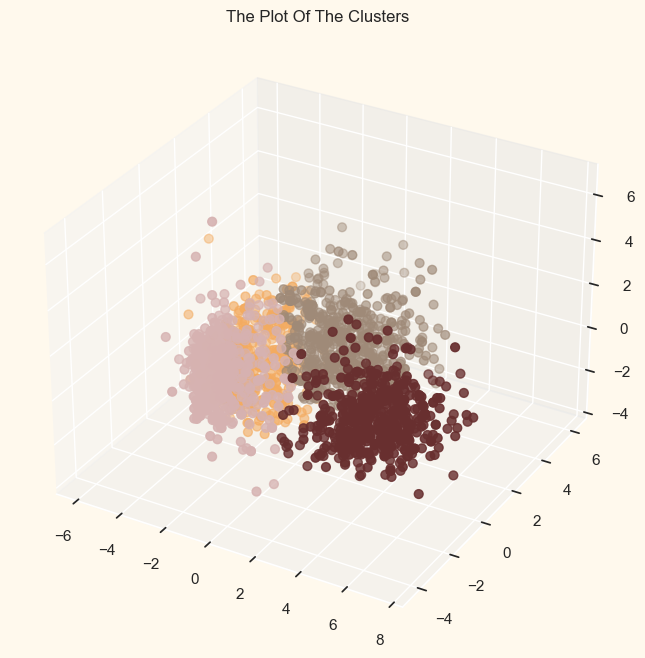

In [22]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

## Hierarchical Clustering
Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

Divisive,
Agglomerative.
**Single Linkage:**
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.
**Complete Linkage:**
In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.
**Average Linkage:**
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.
**ward Linkage:**
goal is to merge clusters in a way that minimizes the increase in total within-cluster variance at each step.

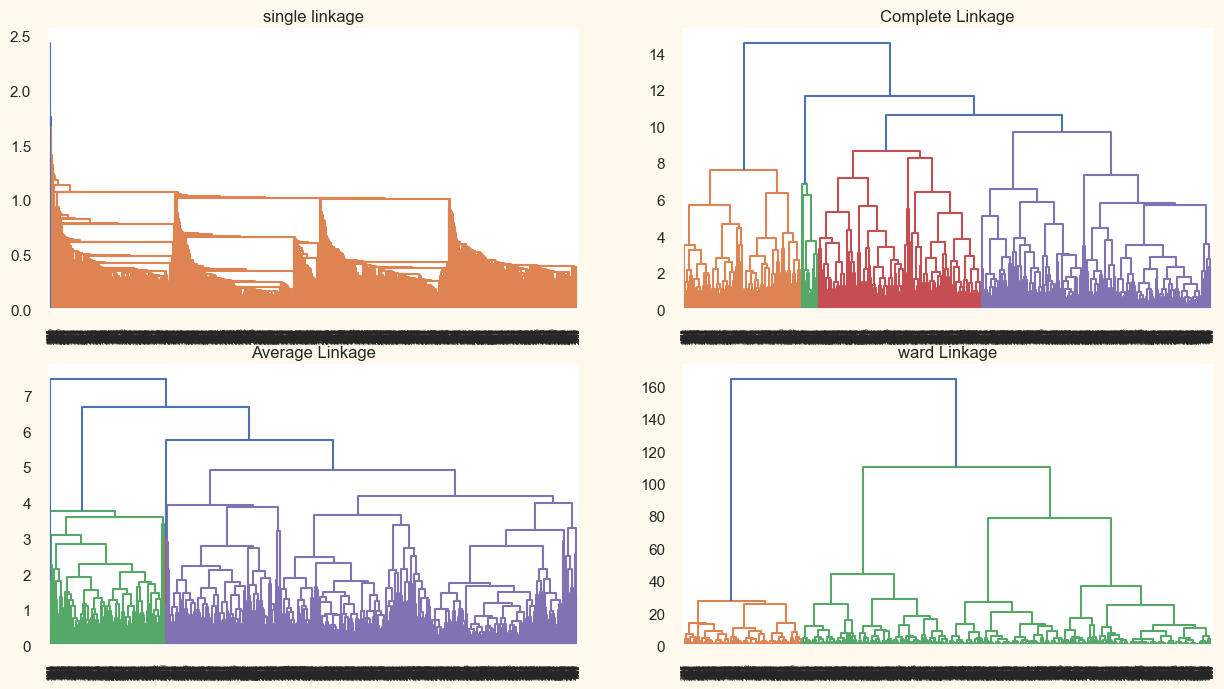

In [23]:
fig,ax=plt.subplots(2,2,figsize=(15,8))
ax1,ax2,ax3,ax4=ax.ravel()
ax1.set_title("single linkage")
ax2.set_title("Complete Linkage")
ax3.set_title("Average Linkage")
ax4.set_title("ward Linkage")
dend=shc.dendrogram(shc.linkage(PCA_ds,method='single'),ax=ax1)
dend1=shc.dendrogram(shc.linkage(PCA_ds,method='complete'),ax=ax2)
dend2=shc.dendrogram(shc.linkage(PCA_ds,method='average'),ax=ax3)
dend3=shc.dendrogram(shc.linkage(PCA_ds,method='ward'),ax=ax4)

In [25]:
#Initiating the Agglomerative Clustering model 
A= AgglomerativeClustering(n_clusters=4)#looking at dendogram ward method is best and it is default in siktlearn
# fit model and predict clusters
yhat_A = A.fit_predict(PCA_ds)
PCA_ds["HClusters"] = yhat_A
#Adding the Clusters feature to the orignal dataframe.
data["HClusters"]= yhat_A

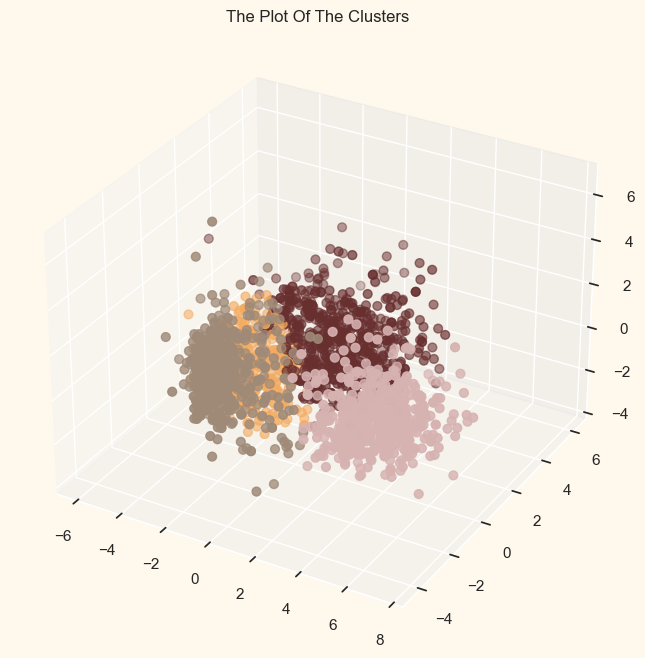

In [26]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["HClusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>EVALUATING MODELS</h2></center>

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns.

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions.

Firstly, let us have a look at the group distribution of clustring

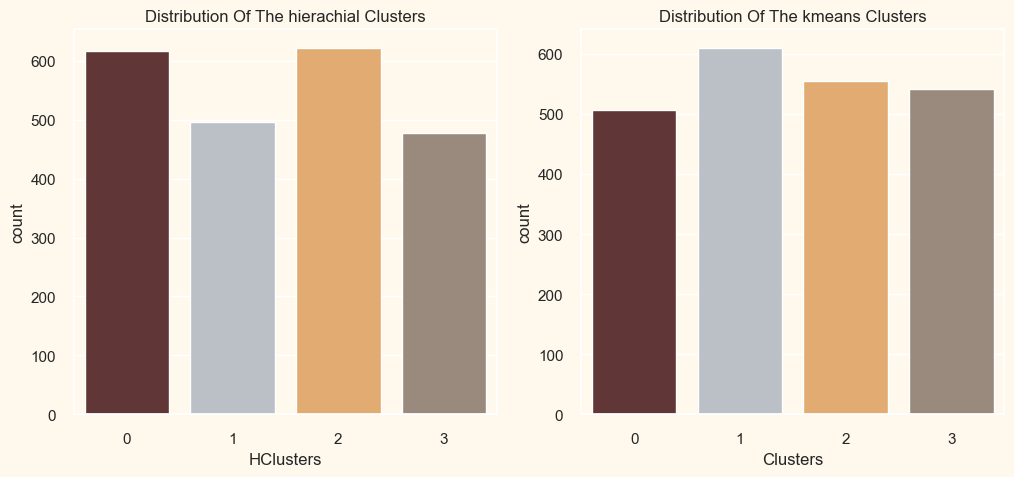

In [27]:
#Plotting countplot of kmeans clusters and hirarchial
pal = ["#682F2F","#B9C0C9","#F3AB60","#9F8A78"]
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pl1 = sns.countplot(x=data["HClusters"], palette= pal)
pl1.set_title("Distribution Of The hierachial Clusters")
ax=f.add_subplot(122)
pl = sns.countplot(x=data["Clusters"], palette= pal,ax=ax)
pl.set_title("Distribution Of The kmeans Clusters")
plt.show()

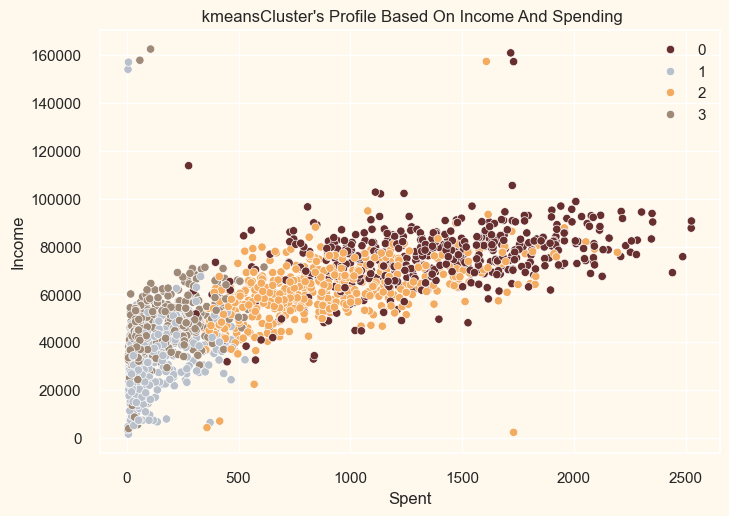

In [28]:

pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["Clusters"], palette= pal)
pl.set_title(" kmeansCluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

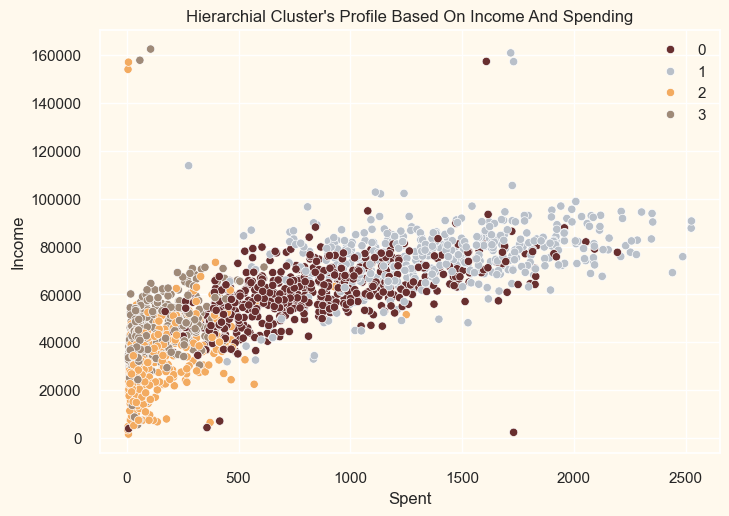

In [29]:
pl = sns.scatterplot(data = data,x=data["Spent"], y=data["Income"],hue=data["HClusters"], palette= pal)
pl.set_title("Hierarchial Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

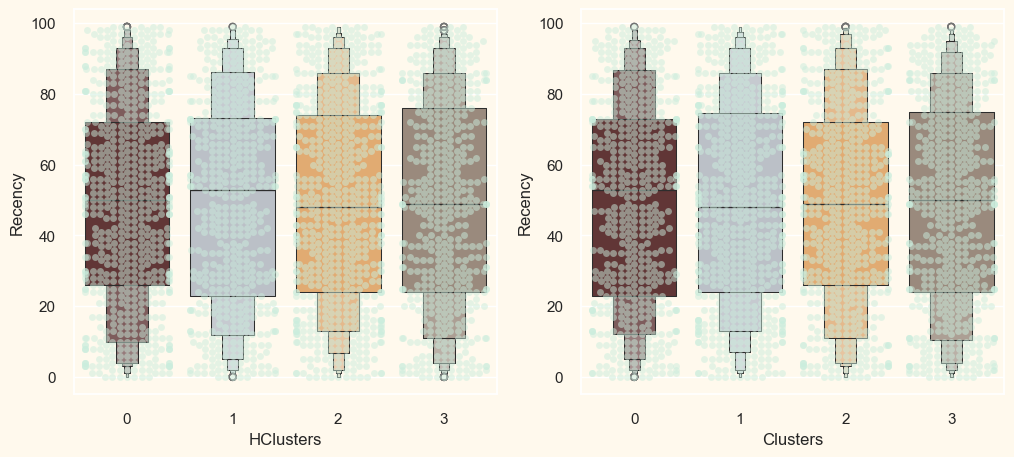

In [33]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pl1=sns.swarmplot(x=data["HClusters"], y=data["Recency"], color= "#CBEDDD", alpha=0.5 ,ax=ax)
pl1=sns.boxenplot(x=data["HClusters"], y=data["Recency"], palette=pal,ax=ax)
ax=f.add_subplot(122)
pl=sns.swarmplot(x=data["Clusters"], y=data["Recency"], color= "#CBEDDD", alpha=0.5 ,ax=ax)
pl=sns.boxenplot(x=data["Clusters"], y=data["Recency"], palette=pal,ax=ax)
plt.show()

Income vs spending plot and recency shows the clusters pattern
here every clusters have same type of recency shows custemors of all clusters are regular customers.clustors differ by amount they spend.in both highrarchial and kmeans clustors

**kmeans**    
<li>group 0: high spending & high income</li>   
<li>group 1: low spending & low income</li>
<li>group 2: high spending & average income</li> 
<li>group 3: low spending & average income </li>

**hierarchial**
<li>group 0: average spending & average income</li>    
<li>group 1: high spending & high income</li>               
<li>group 2: low spending & low income</li>     
<li>group 3: low spending & average income </li>


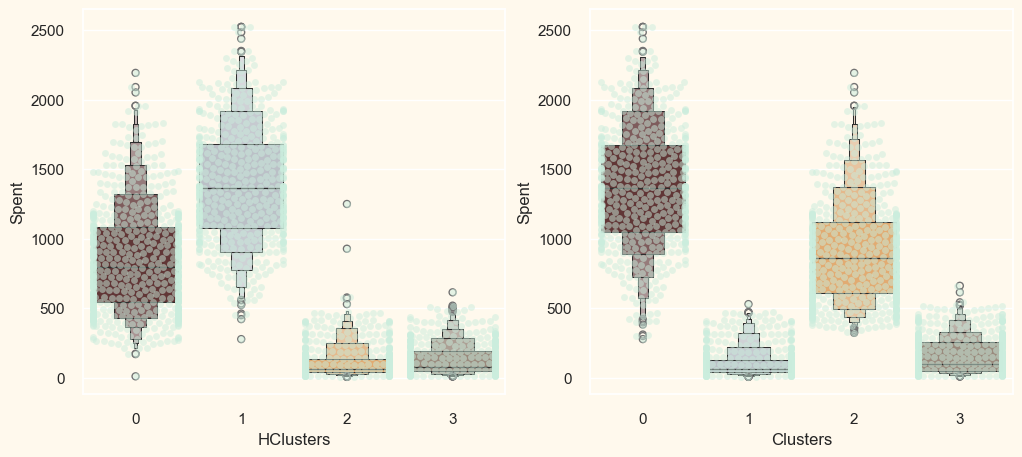

In [30]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pl1=sns.swarmplot(x=data["HClusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 ,ax=ax)
pl1=sns.boxenplot(x=data["HClusters"], y=data["Spent"], palette=pal,ax=ax)
ax=f.add_subplot(122)
pl=sns.swarmplot(x=data["Clusters"], y=data["Spent"], color= "#CBEDDD", alpha=0.5 ,ax=ax)
pl=sns.boxenplot(x=data["Clusters"], y=data["Spent"], palette=pal,ax=ax)
plt.show()

From the above plot, it can be clearly seen that cluster 3 is our biggest set of customers closely followed by cluster 0. We can explore what each cluster is spending on for the targeted marketing strategies.

Let us next explore how did our campaigns do in the past.

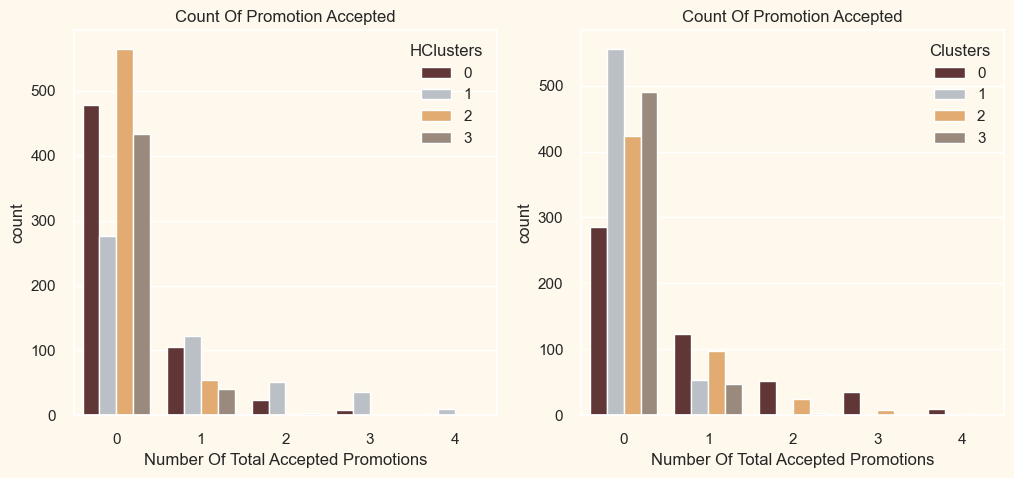

In [31]:
#Creating a feature to get a sum of accepted promotions 
data["Total_Promos"] = data["AcceptedCmp1"]+ data["AcceptedCmp2"]+ data["AcceptedCmp3"]+ data["AcceptedCmp4"]+ data["AcceptedCmp5"]
#Plotting count of total campaign accepted.
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pl1= sns.countplot(x=data["Total_Promos"],hue=data["HClusters"], palette= pal,ax=ax)
pl1.set_title("Count Of Promotion Accepted")
pl1.set_xlabel("Number Of Total Accepted Promotions")
ax=f.add_subplot(122)
pl = sns.countplot(x=data["Total_Promos"],hue=data["Clusters"], palette= pal,ax=ax)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

There has not been an overwhelming response to the campaigns so far. Very few participants overall. Moreover, no one part take in all 5 of them. Perhaps better-targeted and well-planned campaigns are required to boost sales.

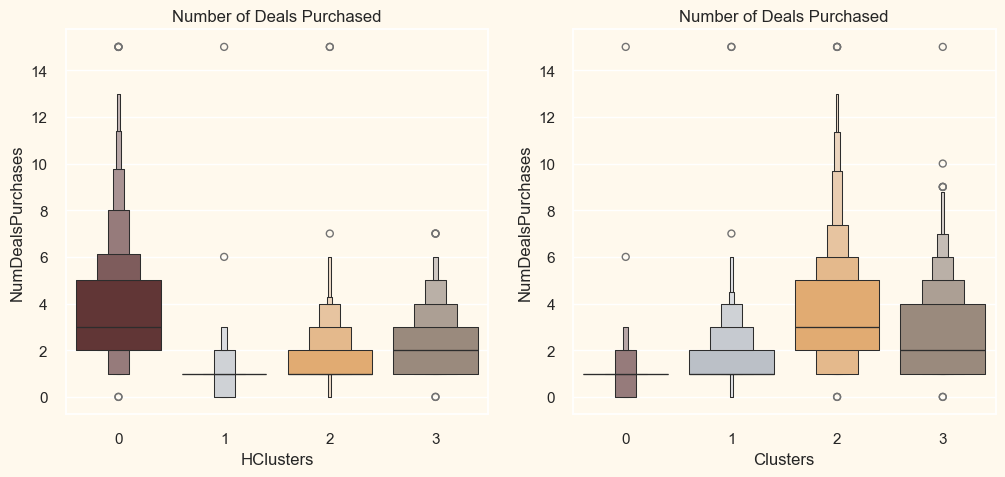

In [32]:
#Plotting the number of deals purchased
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
pl1=sns.boxenplot(y=data["NumDealsPurchases"],x=data["HClusters"], palette= pal,ax=ax)
pl1.set_title("Number of Deals Purchased")
ax=f.add_subplot(122)
pl=sns.boxenplot(y=data["NumDealsPurchases"],x=data["Clusters"], palette= pal,ax=ax)
pl.set_title("Number of Deals Purchased")
plt.show()

Unlike campaigns, the deals offered did well. It has best outcome with cluster 0 and cluster 1. However, our star customers cluster 2 are not much into the deals. Nothing seems to attract cluster 3 overwhelmingly

<center><h2 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";'>PROFILING</h2></center>

Now that we have formed the clusters and looked at their purchasing habits. Let us see who all are there in these clusters. For that, we will be profiling the clusters formed and come to a conclusion about who is our star customer and who needs more attention from the retail store's marketing team.

To decide that I will be plotting some of the features that are indicative of the customer's personal traits in light of the cluster they are in. On the basis of the outcomes, I will be arriving at the conclusions.

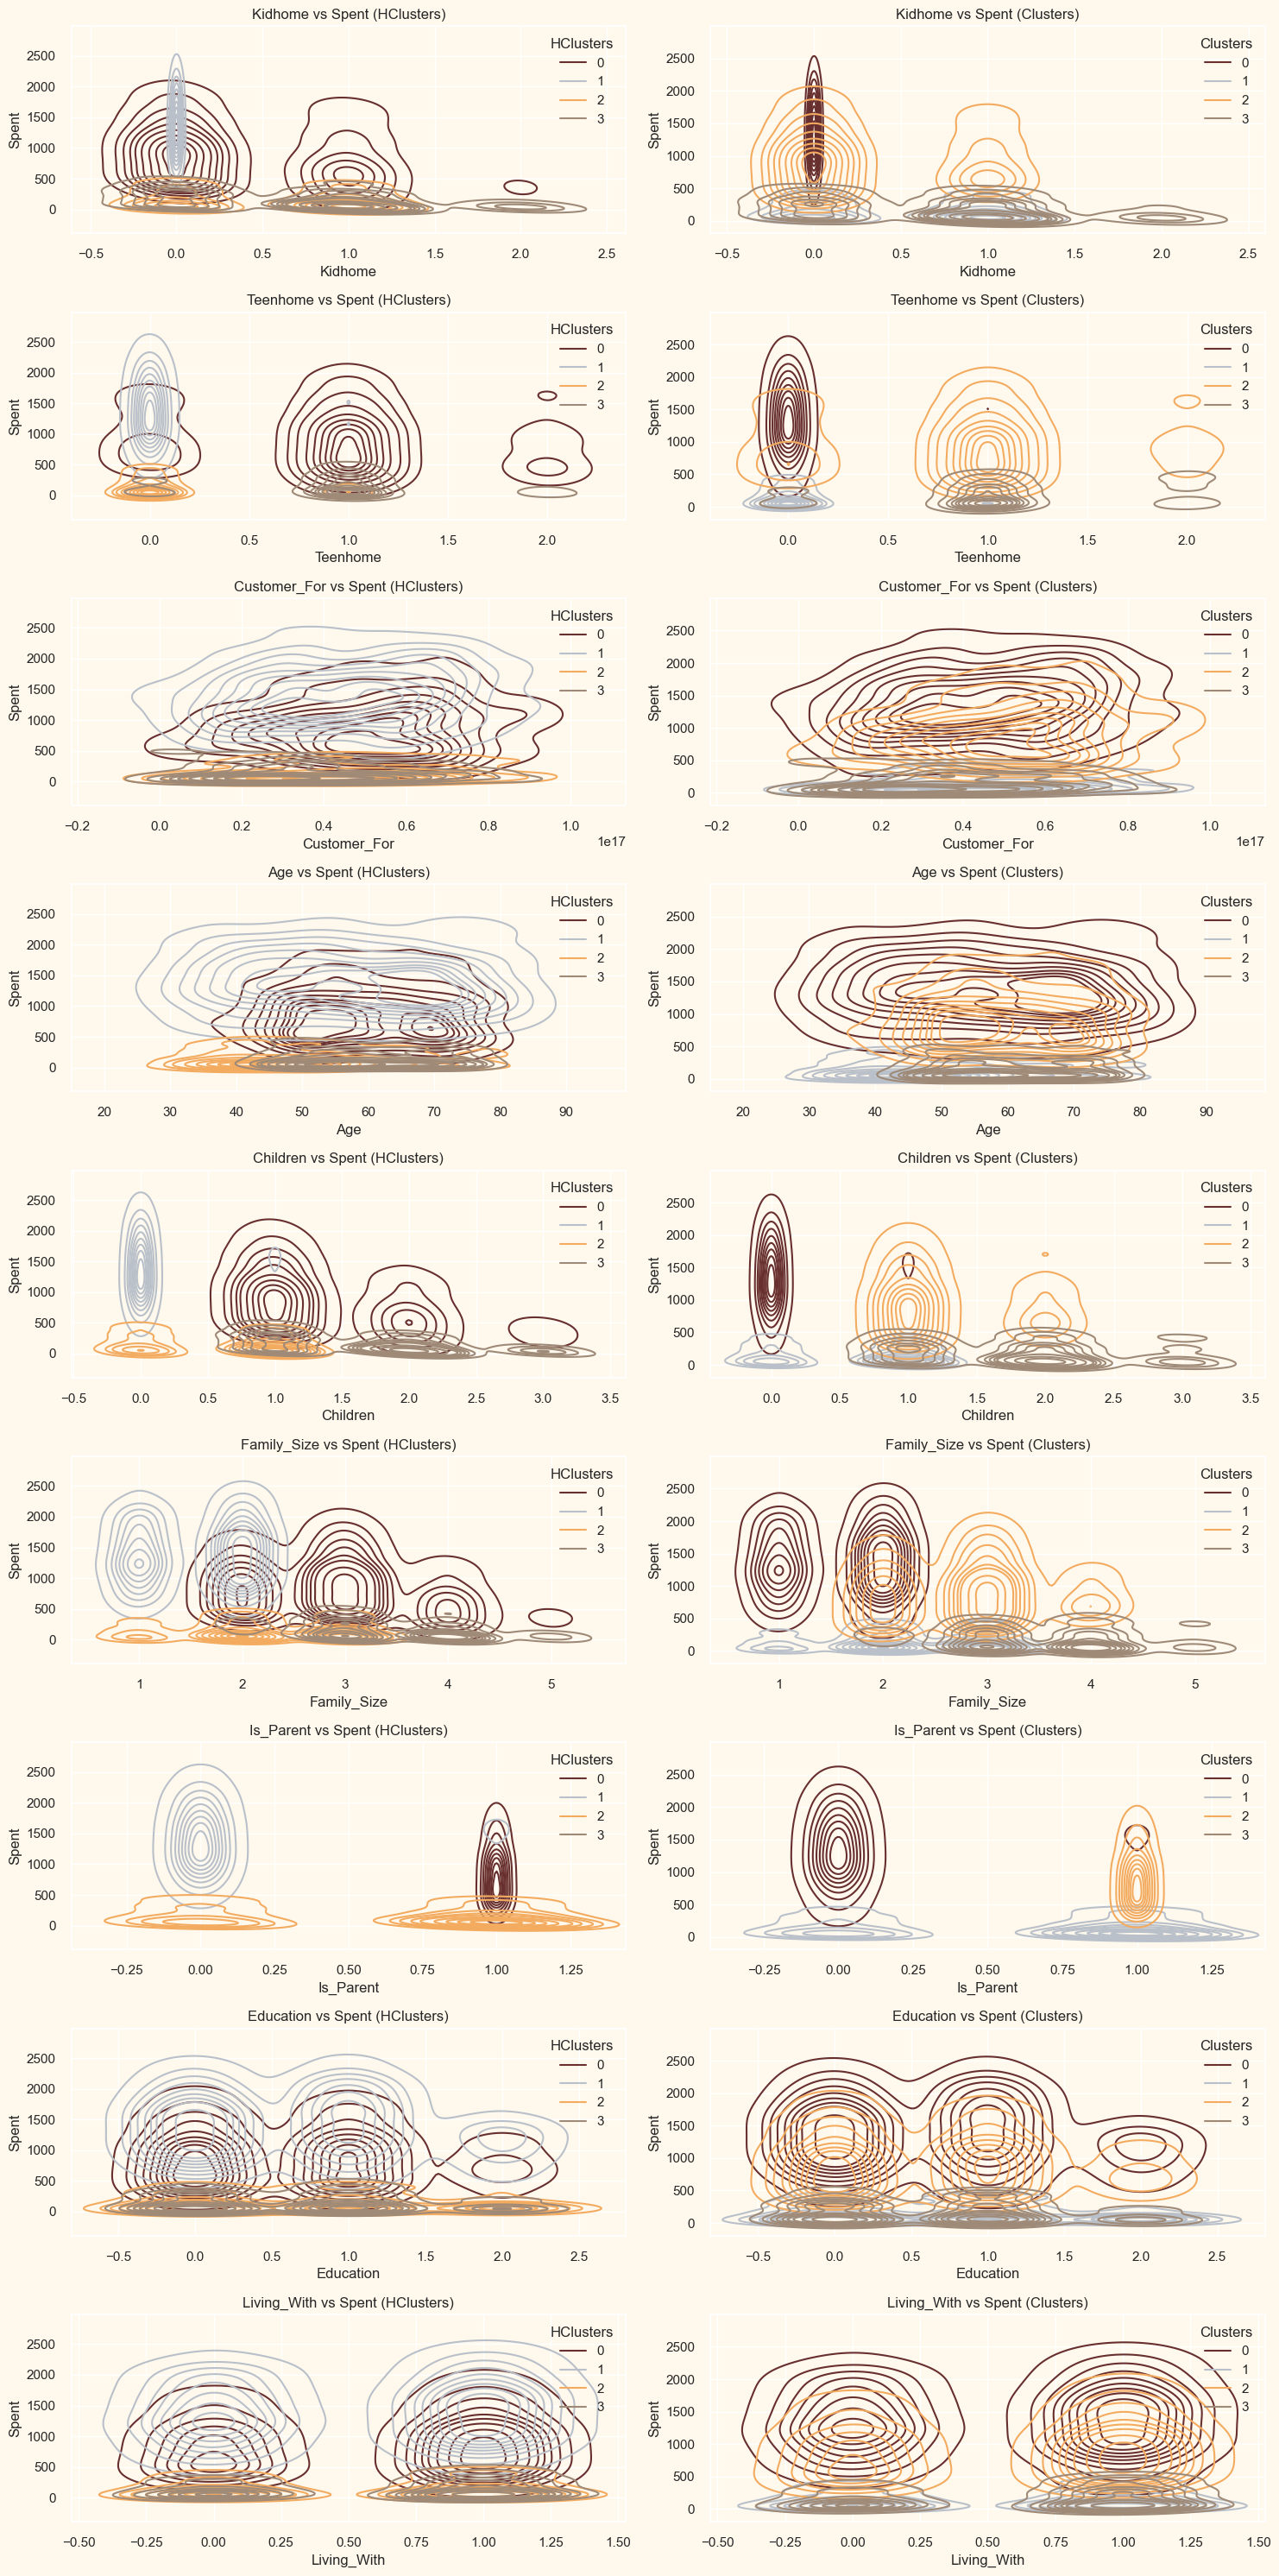

In [43]:
Personal = [ "Kidhome","Teenhome","Customer_For", "Age", "Children", "Family_Size", "Is_Parent", "Education","Living_With"]
ig, axs = plt.subplots(nrows=9, ncols=2, figsize=(15, 30))  # Increase height for clarity

for i, (ax1, ax2) in zip(Personal, axs):
    sns.kdeplot(
        data=data, x=i, y="Spent", hue="HClusters",
        ax=ax1, palette=pal, common_norm=False
    )
    ax1.set_title(f'{i} vs Spent (HClusters)')

    sns.kdeplot(
        data=data, x=i, y="Spent", hue="Clusters",
        ax=ax2, palette=pal, common_norm=False
    )
    ax2.set_title(f'{i} vs Spent (Clusters)')

plt.tight_layout()
plt.show()



In [ ]:
from IPython.display import HTML, display

# 1️⃣ Load CSS
css = """
.cluster-0 { background-color: #D0F0C0; padding: 12px; margin: 6px 0; border-radius: 4px; }
.cluster-1 { background-color: pink; padding: 12px; margin: 6px 0; border-radius: 4px; }
.cluster-2 { background-color: #D0D0F0; padding: 12px; margin: 6px 0; border-radius: 4px; }
.cluster-3 { background-color: #F0F0C0; padding: 12px; margin: 6px 0; border-radius: 4px; }
.cluster-header { font-size: 1.1em; margin-bottom: 4px; font-weight: bold; }
"""
display(HTML(f"<style>{css}</style>"))

# 2️⃣ Define and render clusters
clusters = {
    0: ("Affluent Couples, No or Few Kids", [
        "Max 2 family members (often partners without children)",
        "All ages",
        "High income"
    ]),
    1: ("Young Single‑Child Families", [
        "Majority parents (3 family members: couple + 1 kid)",
        "All ages (likely younger parents)",
        "Low income"
    ]),
    2: ("Average‑Income Parents", [
        "Definitely parents; 2–4 family members",
        "All ages",
        "Average income"
    ]),
    3: ("Older Low‑Income Families with Teens", [
        "2–5 family members",
        "Relatively older adults; teenagers present",
        "Low income"
    ]),
}

html = ""
for idx, (title, points) in clusters.items():
    html += f'<div class="cluster-{idx}">'
    html += f'<div class="cluster-header">Cluster {idx} – {title}</div><ul>'
    for p in points:
        html += f'<li>{p}</li>'
    html += '</ul></div>'

display(HTML(html))


<p>
    In <b>hierarchical clustering</b>, we observe very similar group separations.same
    basic traits appear across clusterings, simply with different cluster numbering.
</p>

In [13]:
from IPython.display import display, HTML

html = """

<div style="padding: 10px; margin: 10px 0; background-color: #D0F0C0;">
  <h3 style="color: #2E8B57;">🟢 Cluster 0 – Affluent Couples, No or Few Kids</h3>
  <ul>
    <li><strong>Focus:</strong> Premium and organic products</li>
    <li><strong>Promotions:</strong> Wine, cheese, gourmet ready meals</li>
    <li><strong>Loyalty:</strong> Exclusive member discounts</li>
  </ul>
</div>

<div style="padding: 10px; margin: 10px 0; background-color: #FFFACD;">
  <h3 style="color: #DAA520;">🟡 Cluster 1 – Young Single‑Child Families</h3>
  <ul>
    <li><strong>Focus:</strong> Affordable baby and toddler food</li>
    <li><strong>Promotions:</strong> Family meal deals, discounts on essentials</li>
    <li><strong>Loyalty:</strong> Coupons for diapers, formula, kids snacks</li>
  </ul>
</div>

<div style="padding: 10px; margin: 10px 0; background-color: #ADD8E6;">
  <h3 style="color: #1E90FF;">🔵 Cluster 2 – Average‑Income Parents</h3>
  <ul>
    <li><strong>Focus:</strong> Balanced pricing and quality</li>
    <li><strong>Promotions:</strong> Weekly staples, multipacks</li>
    <li><strong>Loyalty:</strong> Points-based savings on family baskets</li>
  </ul>
</div>

<div style="padding: 10px; margin: 10px 0; background-color: #F4C2C2;">
  <h3 style="color: #B22222;">🔴 Cluster 3 – Older Low‑Income Families with Teens</h3>
  <ul>
    <li><strong>Focus:</strong> Budget-friendly meals for larger families</li>
    <li><strong>Promotions:</strong> Value packs, school lunch deals</li>
    <li><strong>Loyalty:</strong> Discounts on bulk purchases</li>
  </ul>
</div>
"""

display(HTML(html))


<center><h1 style='color:white ;background-color:#5c4033;font-family:"Times New Roman";font-size:42px;border-radius:10px;'>END</h1></center>

Thank you.....